# Below we will import various libraries that are needed for data preprocessing.

In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

## Dataset : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# Let us see how the librosa library loads the audio file and see the sample rate.

In [2]:
y, sr = librosa.load('wavfiles/blues.00005.wav')

In [3]:
y.shape

(661794,)

# Sampling rate

In [4]:
sr

22050

## Ref: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

# Plotting the wave(signal) using matplot

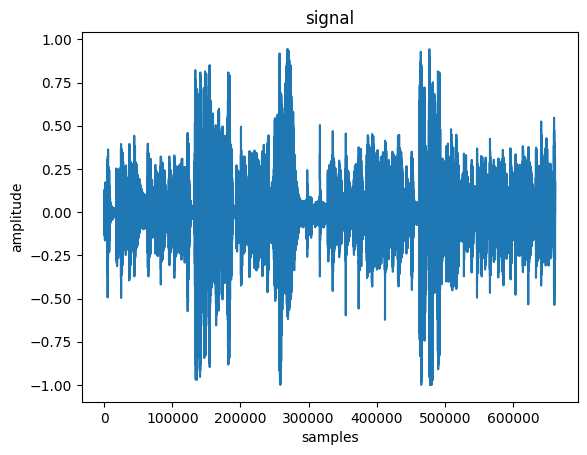

In [5]:
# Plotting the wave
plt.plot(y);
plt.title('signal');
plt.xlabel('samples');
plt.ylabel('amplitude');

# Fourier Transform

In [6]:
fourier_transform = np.abs(librosa.stft(y[:2048], hop_length = 2048+1))

In [7]:
plt.plot(fourier_transform);
plt.title('spectrum');
plt.xlabel('frequency');
plt.ylabel('amplitude');

# Plotting the spectrogram

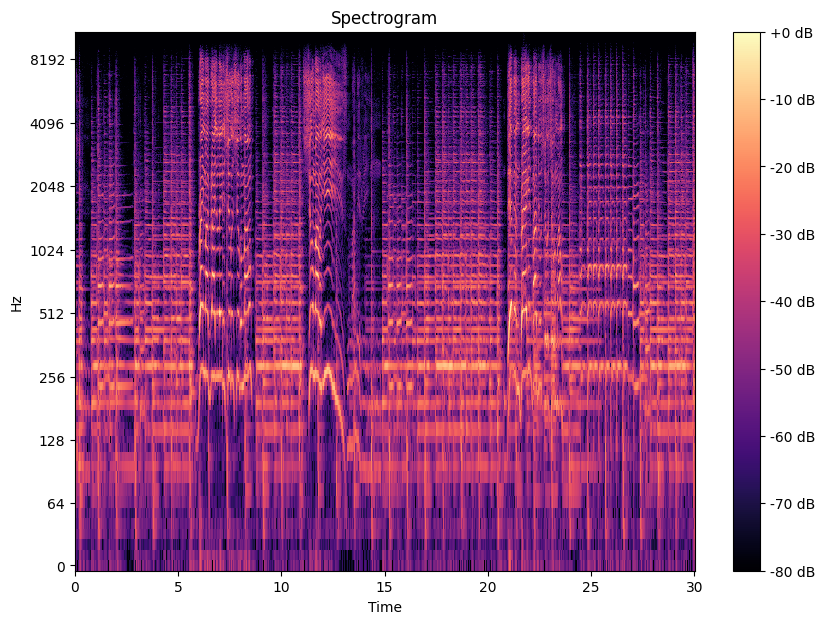

In [8]:
spectrogram = np.abs(librosa.stft(y, hop_length=512))
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7));
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

# Melspectrogram

In [9]:
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7))
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

# MFFC 

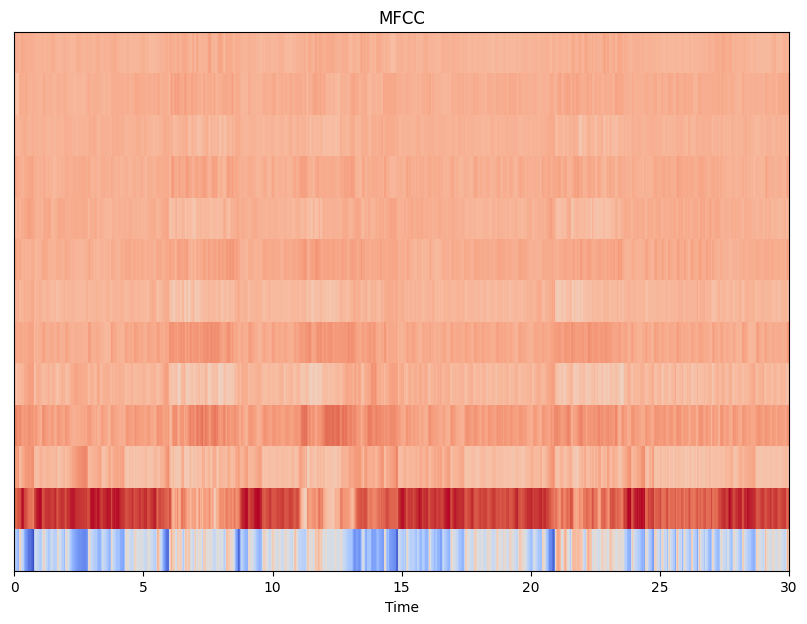

In [10]:
mfccData = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
plt.figure(figsize=(10,7));
librosa.display.specshow(mfccData, x_axis='time');
plt.title('MFCC');

# Below we will extract the sepctrogram data from the audio files in the parent folder. And save them into a dataframe and X and y.

In [14]:
def melspectrogram(folder):
    genre_labels = []
    melspectrograms = []
    m = []
    gl = []
    for f in os.scandir(folder):
        y, sr = librosa.core.load(f)
        label = str(f).split('.')[0][11:]
        genre_labels.append(label)
        gl.append(label)
        spectrograms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spectrograms = librosa.power_to_db(spectrograms, ref=np.max)
        if spectrograms.shape[1] != 660:
            spectrograms.resize(128,660, refcheck=False)
        melspectrograms.append(spectrograms)
        s = spectrograms.flatten()
        m.append(s)
        
    m = np.array(m)
    gl = np.array(gl).reshape(1000,1)
    data = np.hstack((m,gl))
    data = pd.DataFrame(data)
    genre_labels = pd.Series(genre_labels)
    genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}
    X = np.array(melspectrograms)
    y = genre_labels.map(genreLabels)
    
    return X, y,data

In [17]:
X, y, data = melspectrogram('wavfiles/')

In [18]:
data.to_csv('spectrogramdata.csv', index=False)

# Data Cleaning

## Lets read the data and do the necessary changes

In [19]:
print(data)

          0           1           2           3           4           5      \
0     -24.25912  -27.340237  -27.214727  -23.694857  -10.349419  -11.817766   
1     -38.26087  -29.062458  -34.239838  -41.848854   -38.88456  -46.740932   
2    -34.762463   -38.35721  -37.502674  -32.508842  -22.891088   -28.22428   
3     -44.66066   -58.00811   -51.76494  -48.831757   -54.74565   -56.27259   
4     -19.03621  -22.886148  -39.371696  -39.873516  -44.111927  -41.430832   
..          ...         ...         ...         ...         ...         ...   
995  -15.886957  -21.009079  -18.170067  -20.970758  -17.895927  -14.286556   
996  -28.580347   -40.67562  -37.866726  -26.536753  -37.540432   -47.82762   
997  -20.458214  -28.162466  -39.112106  -49.584106  -50.964493   -47.62478   
998   -28.98172  -25.066292   -33.94162  -28.501343  -25.769508  -30.965109   
999  -28.075594  -44.787285  -40.376213  -38.162064  -41.120914  -39.990948   

          6           7           8           9    

In [20]:
data.head()

0           1           2           3           4           5      \
0   -24.25912  -27.340237  -27.214727  -23.694857  -10.349419  -11.817766   
1   -38.26087  -29.062458  -34.239838  -41.848854   -38.88456  -46.740932   
2  -34.762463   -38.35721  -37.502674  -32.508842  -22.891088   -28.22428   
3   -44.66066   -58.00811   -51.76494  -48.831757   -54.74565   -56.27259   
4   -19.03621  -22.886148  -39.371696  -39.873516  -44.111927  -41.430832   

        6           7           8           9      ... 84471 84472 84473  \
0  -19.678226  -26.396507  -25.827951  -30.779963  ...   0.0   0.0   0.0   
1  -41.780075  -42.449265   -37.31029  -38.989906  ...   0.0   0.0   0.0   
2  -33.885254  -35.000267  -35.614574  -36.325577  ...   0.0   0.0   0.0   
3  -52.029984   -54.15286  -57.492695   -55.96265  ...   0.0   0.0   0.0   
4  -35.432774  -43.907005   -44.25971  -45.559254  ...   0.0   0.0   0.0   

  84474 84475 84476 84477 84478 84479   84480  
0   0.0   0.0   0.0   0.0   0.0   0.0  reggae  
1   0.0   0.0   0.0   0.0   0.0   0.0    jazz  
2   0.0   0.0   0.0   0.0   0.0   0.0   disco  
3   0.0   0.0   0.0   0.0   0.0   0.0    jazz  
4   0.0   0.0   0.0   0.0   0.0   0.0   disco  

[5 rows x 84481 columns]

In [21]:
data.iloc[:,-1:]

84480
0    reggae
1      jazz
2     disco
3      jazz
4     disco
..      ...
995   disco
996    jazz
997   disco
998    jazz
999  reggae

[1000 rows x 1 columns]

### Lets rename the above column and map them to the values 

In [22]:
genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}

In [23]:
data.columns = data.columns.astype(str)
data = data.rename(columns={"84480": "labels"})

In [24]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '84471', '84472', '84473', '84474', '84475', '84476', '84477', '84478',
       '84479', 'labels'],
      dtype='object', length=84481)

In [25]:
data['y'] = data['labels'].map(genreLabels)

In [26]:
data

0           1           2           3           4           5  \
0     -24.25912  -27.340237  -27.214727  -23.694857  -10.349419  -11.817766   
1     -38.26087  -29.062458  -34.239838  -41.848854   -38.88456  -46.740932   
2    -34.762463   -38.35721  -37.502674  -32.508842  -22.891088   -28.22428   
3     -44.66066   -58.00811   -51.76494  -48.831757   -54.74565   -56.27259   
4     -19.03621  -22.886148  -39.371696  -39.873516  -44.111927  -41.430832   
..          ...         ...         ...         ...         ...         ...   
995  -15.886957  -21.009079  -18.170067  -20.970758  -17.895927  -14.286556   
996  -28.580347   -40.67562  -37.866726  -26.536753  -37.540432   -47.82762   
997  -20.458214  -28.162466  -39.112106  -49.584106  -50.964493   -47.62478   
998   -28.98172  -25.066292   -33.94162  -28.501343  -25.769508  -30.965109   
999  -28.075594  -44.787285  -40.376213  -38.162064  -41.120914  -39.990948   

              6           7           8           9  ... 84472 84473 84474  \
0    -19.678226  -26.396507  -25.827951  -30.779963  ...   0.0   0.0   0.0   
1    -41.780075  -42.449265   -37.31029  -38.989906  ...   0.0   0.0   0.0   
2    -33.885254  -35.000267  -35.614574  -36.325577  ...   0.0   0.0   0.0   
3    -52.029984   -54.15286  -57.492695   -55.96265  ...   0.0   0.0   0.0   
4    -35.432774  -43.907005   -44.25971  -45.559254  ...   0.0   0.0   0.0   
..          ...         ...         ...         ...  ...   ...   ...   ...   
995   -15.84532  -21.424644  -15.735584  -26.264038  ...   0.0   0.0   0.0   
996   -41.86157  -34.062653  -41.674835   -46.35202  ...   0.0   0.0   0.0   
997  -53.555138  -53.900146   -48.48716  -46.269096  ...   0.0   0.0   0.0   
998  -26.607338  -23.986835  -25.150654  -26.404161  ...   0.0   0.0   0.0   
999   -43.53227  -46.734215   -41.29081  -46.839893  ...   0.0   0.0   0.0   

    84475 84476 84477 84478 84479  labels  y  
0     0.0   0.0   0.0   0.0   0.0  reggae  9  
1     0.0   0.0   0.0   0.0   0.0    jazz  6  
2     0.0   0.0   0.0   0.0   0.0   disco  4  
3     0.0   0.0   0.0   0.0   0.0    jazz  6  
4     0.0   0.0   0.0   0.0   0.0   disco  4  
..    ...   ...   ...   ...   ...     ... ..  
995   0.0   0.0   0.0   0.0   0.0   disco  4  
996   0.0   0.0   0.0   0.0   0.0    jazz  6  
997   0.0   0.0   0.0   0.0   0.0   disco  4  
998   0.0   0.0   0.0   0.0   0.0    jazz  6  
999   0.0   0.0   0.0   0.0   0.0  reggae  9  

[1000 rows x 84482 columns]

# EDA

In [27]:
genres = list(data['labels'].unique())

In [28]:
genres

['reggae',
 'jazz',
 'disco',
 'rock',
 'metal',
 'pop',
 'country',
 'blues',
 'classical',
 'hiphop']

In [34]:
def plotMelSpectrogram(genre):
    y, sr = librosa.core.load(f'wavfiles/{genre}.00000.wav')
    s = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    s = librosa.power_to_db(s, ref=np.max)
    plt.figure(figsize=(12,8))
    librosa.display.specshow(s, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

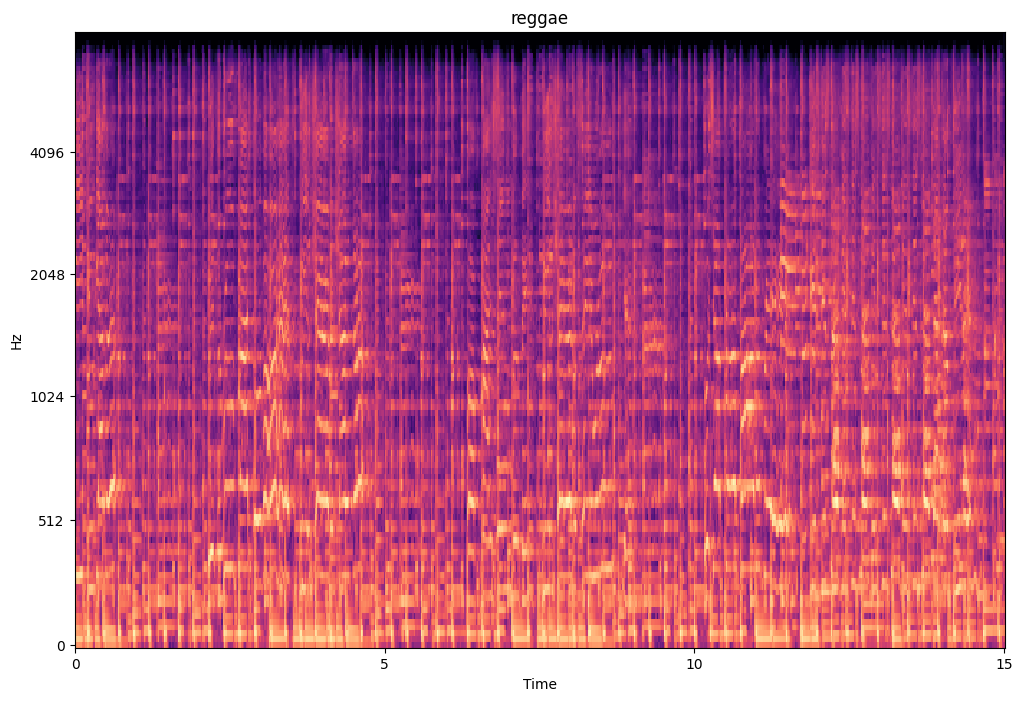

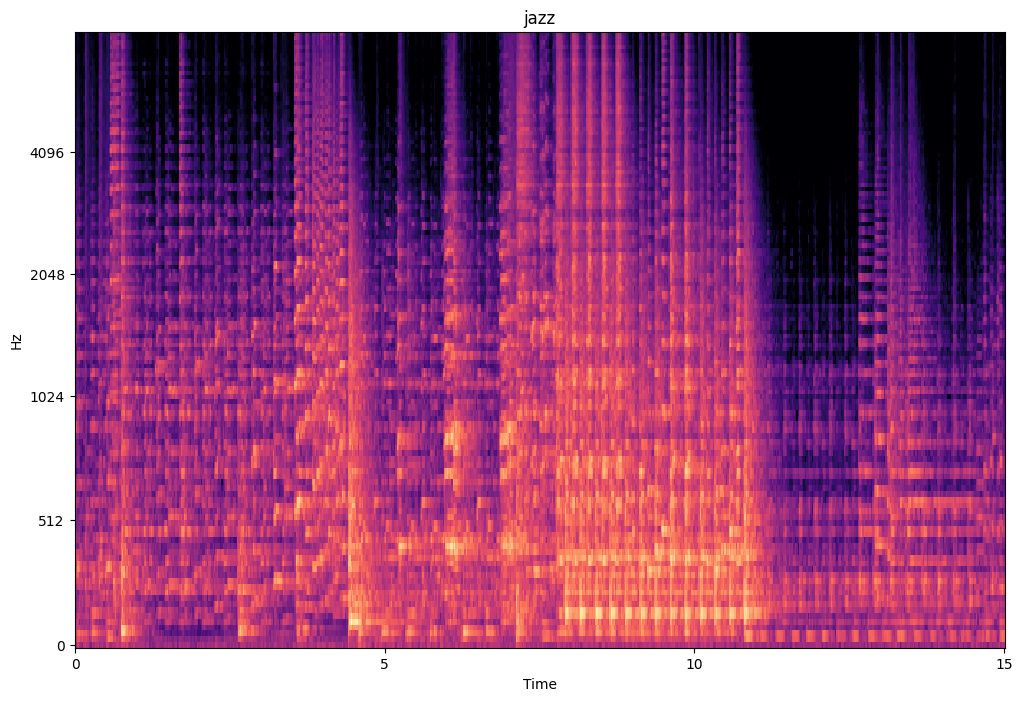

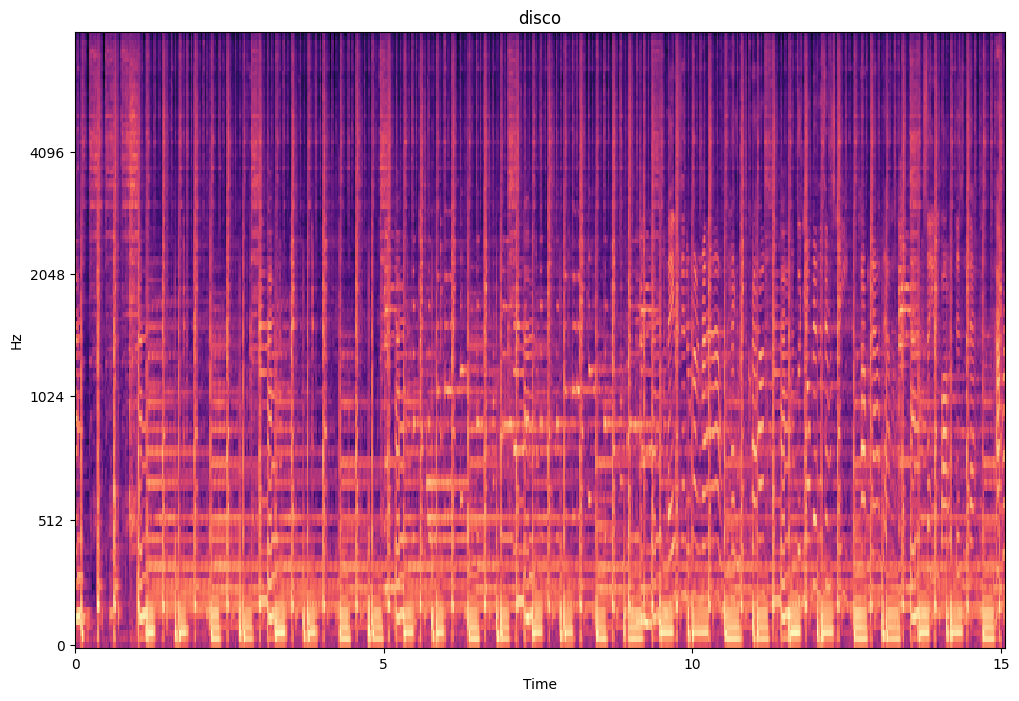

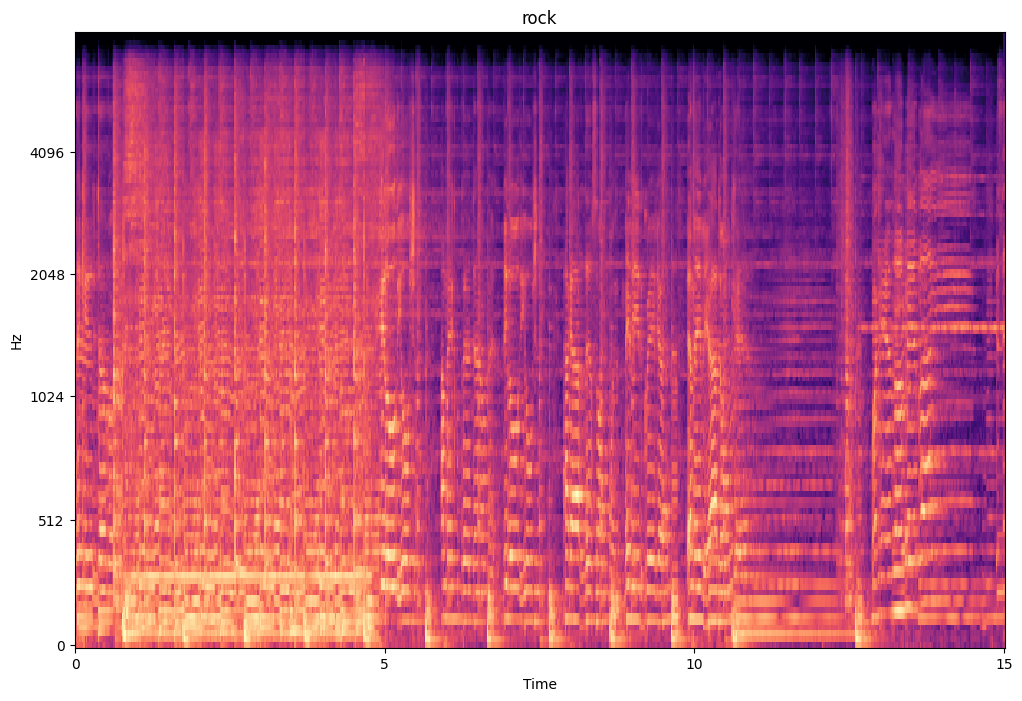

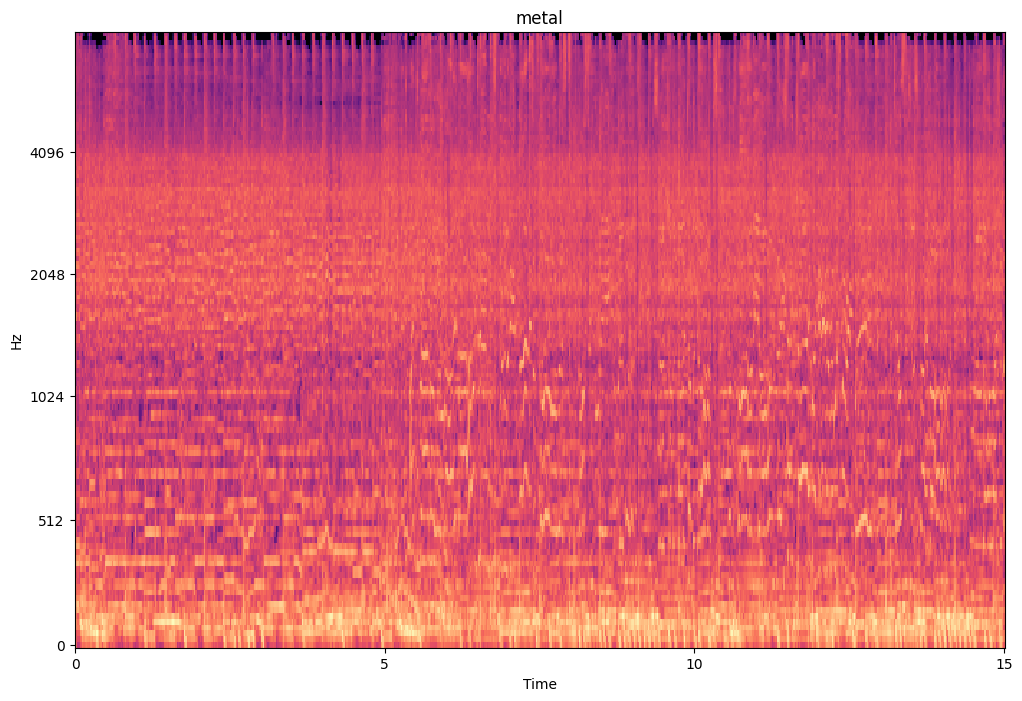

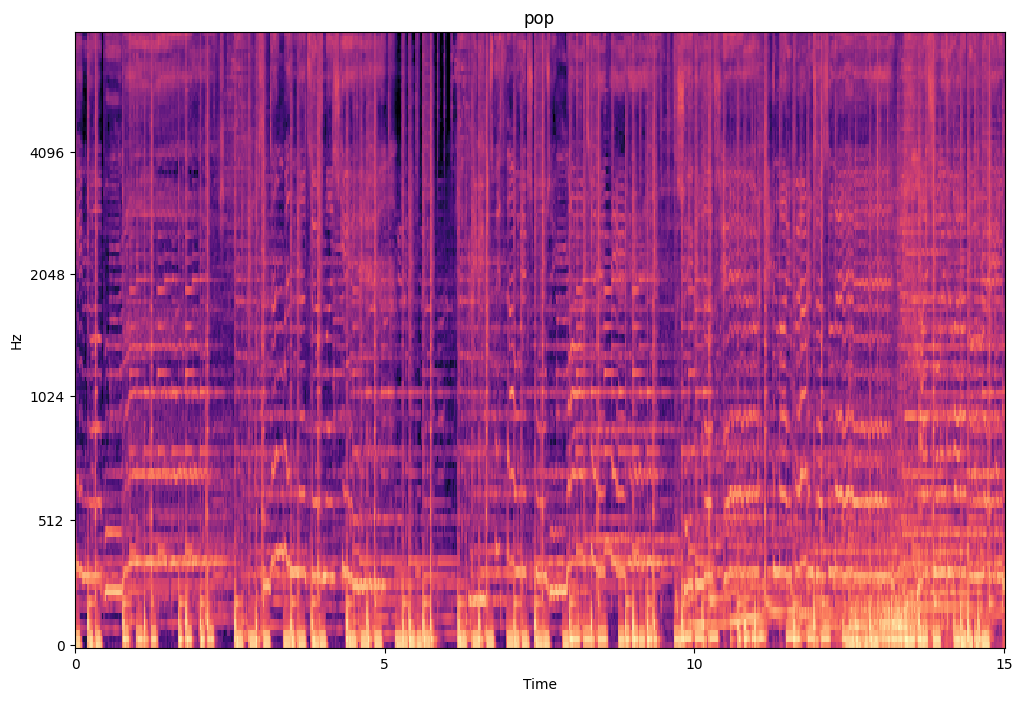

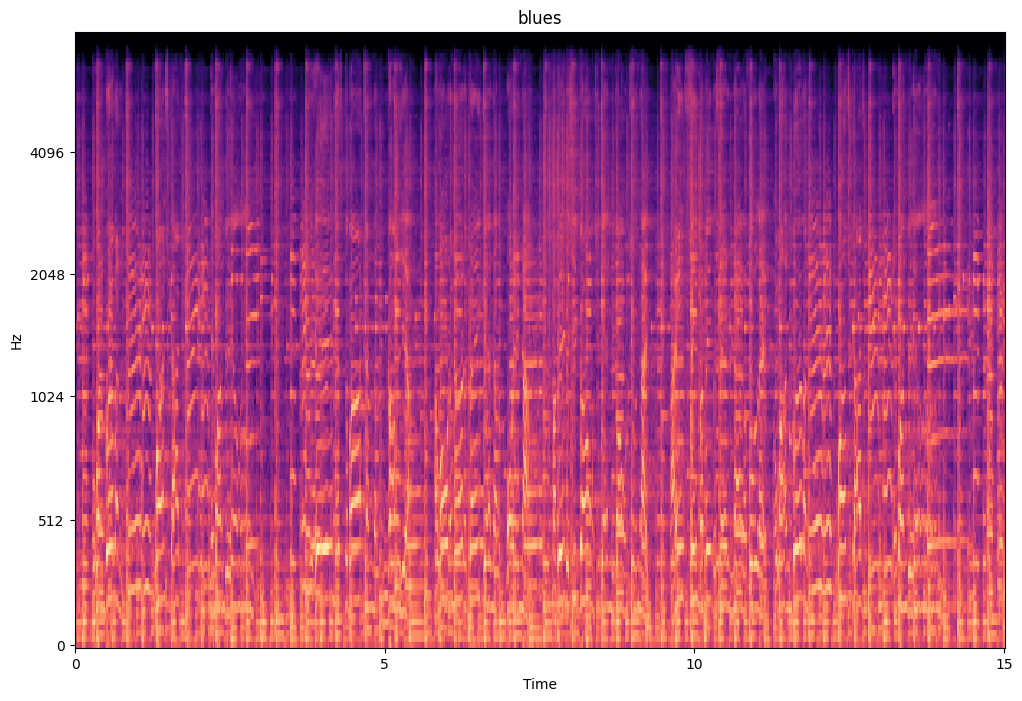

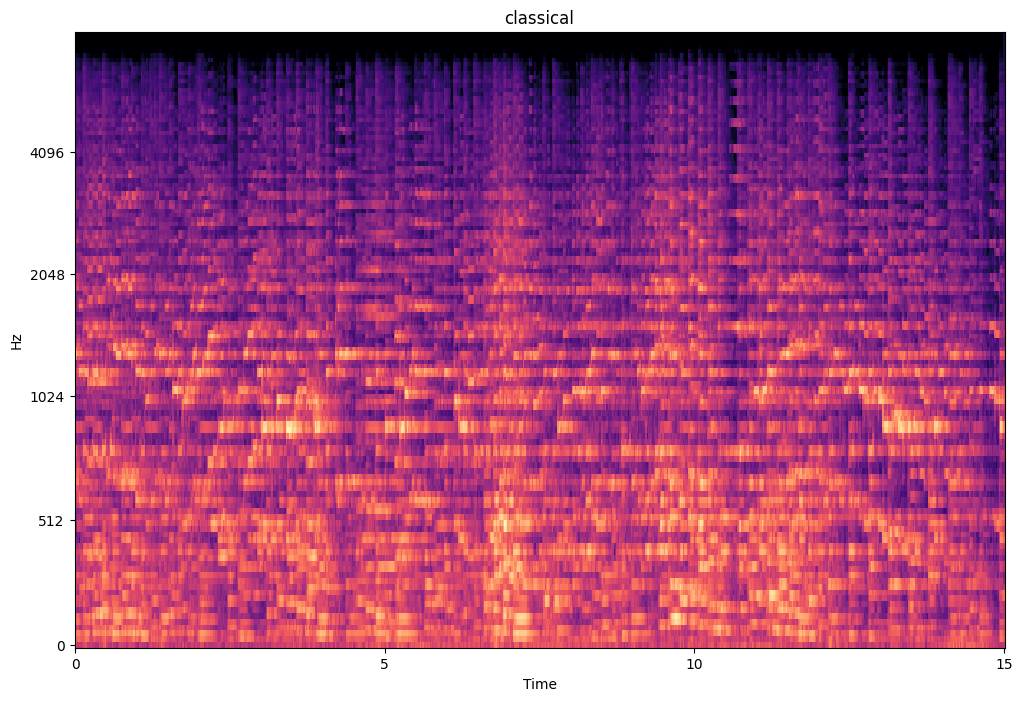

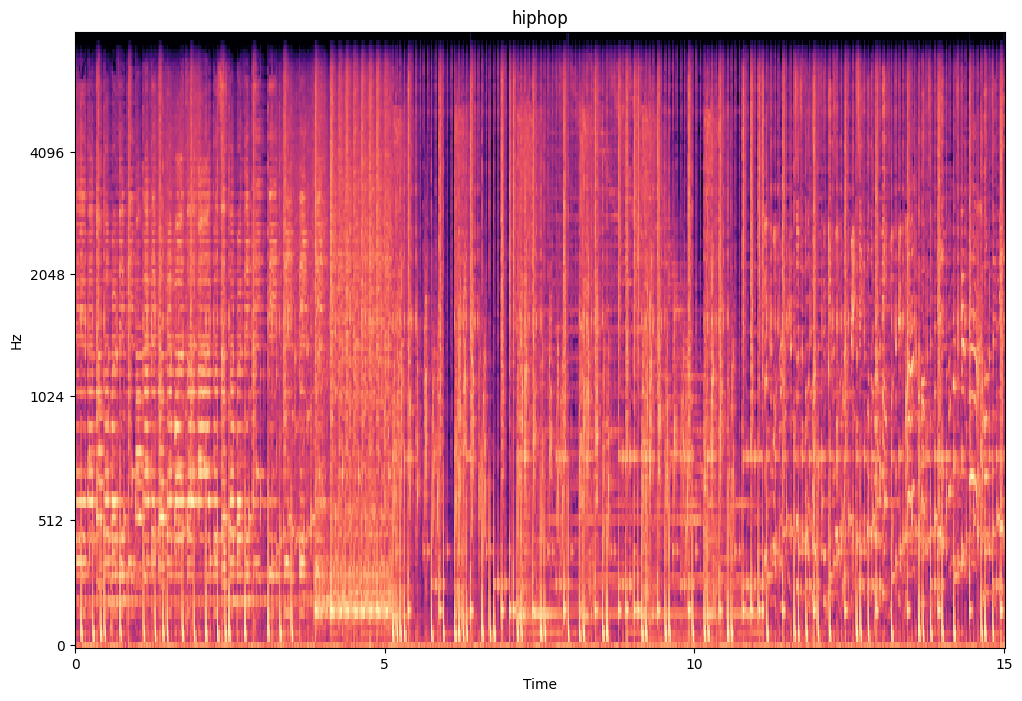

In [35]:
for g in genres:
    plotMelSpectrogram(g)